<a href="https://colab.research.google.com/github/MockaWolke/Places/blob/master/Transfer_train_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
model_name = "ENB2-Aug-Transfer-All"

In [ ]:
!git clone https://github.com/MockaWolke/Places.git
from google.colab import drive
drive.mount('/content/drive')
!cp drive/MyDrive/UAL/View_Directions.zip View_Directions.zip 
!cp drive/MyDrive/UAL/data.csv Places/data.csv 
!unzip -q View_Directions.zip -d Places
!rm  View_Directions.zip

import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow_datasets as tfds
import os
os.chdir("Places")
import ds_generator
import models
import plotting

Cloning into 'Places'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 43 (delta 23), reused 29 (delta 10), pack-reused 0
Unpacking objects: 100% (43/43), done.
Mounted at /content/drive


In [ ]:
train_ds, val_ds = ds_generator.get_train_and_val()
model = tf.keras.models.load_model('../drive/MyDrive/UAL/models/ENB2-Aug-Transfer/last_model')
model = models.unfreeze_model(model)

In [ ]:
model_loc = "../drive/MyDrive/UAL/models/"+ model_name
log_dir = model_loc + "/logs"
checkpoint_path = model_loc + "/saves_after_e10"
last_model = model_loc + "/last_model_after_e10"

if model_name not in os.listdir("../drive/MyDrive/UAL/models/"):

  os.makedirs(model_loc )
  os.makedirs(log_dir)
  os.makedirs(checkpoint_path)
  os.makedirs(last_model)
  


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_best_only=True)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.02,
    patience=4,
    verbose=1,
    mode='auto',
    restore_best_weights=True
) 

In [ ]:
hist = model.fit(train_ds, epochs=10, validation_data=val_ds,callbacks=[tensorboard_callback,cp_callback,early_stopping_callback])

Epoch 1/10
1616/1616 [==============================] - ETA: 0s - loss: 0.3481 - accuracy: 0.8659
Epoch 1: val_loss improved from inf to 0.26133, saving model to ../drive/MyDrive/UAL/models/ENB2-Aug-Transfer-All/saves
1616/1616 [==============================] - 501s 296ms/step - loss: 0.3481 - accuracy: 0.8659 - val_loss: 0.2613 - val_accuracy: 0.9026
Epoch 2/10
1616/1616 [==============================] - ETA: 0s - loss: 0.2785 - accuracy: 0.8922
Epoch 2: val_loss improved from 0.26133 to 0.23847, saving model to ../drive/MyDrive/UAL/models/ENB2-Aug-Transfer-All/saves
1616/1616 [==============================] - 479s 297ms/step - loss: 0.2785 - accuracy: 0.8922 - val_loss: 0.2385 - val_accuracy: 0.9075
Epoch 3/10
1616/1616 [==============================] - ETA: 0s - loss: 0.2485 - accuracy: 0.9046
Epoch 3: val_loss improved from 0.23847 to 0.20600, saving model to ../drive/MyDrive/UAL/models/ENB2-Aug-Transfer-All/saves
1616/1616 [==============================] - 479s 296ms/step - l

### Stopped Training - No increases

no save model

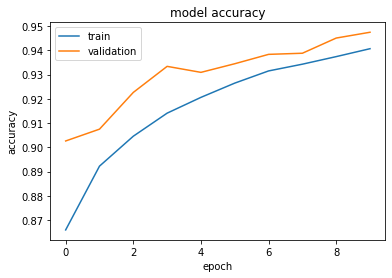

In [ ]:
plotting.plot_hist(hist)

In [ ]:
model.load_weights(checkpoint_path)

In [ ]:
model.save(last_model)

INFO:tensorflow:Assets written to: ../drive/MyDrive/UAL/models/ENB2-Aug-Transfer-All/last_model/assets


In [ ]:
hist = model.fit(train_ds, epochs=15, validation_data=val_ds,callbacks=[tensorboard_callback,cp_callback,early_stopping_callback],initial_epoch=10)

Epoch 11/15
1616/1616 [==============================] - ETA: 0s - loss: 0.1493 - accuracy: 0.9445
Epoch 11: val_loss improved from inf to 0.14600, saving model to ../drive/MyDrive/UAL/models/ENB2-Aug-Transfer-All/saves_after_e10
1616/1616 [==============================] - 507s 313ms/step - loss: 0.1493 - accuracy: 0.9445 - val_loss: 0.1460 - val_accuracy: 0.9462
Epoch 12/15
1616/1616 [==============================] - ETA: 0s - loss: 0.1434 - accuracy: 0.9458
Epoch 12: val_loss improved from 0.14600 to 0.13779, saving model to ../drive/MyDrive/UAL/models/ENB2-Aug-Transfer-All/saves_after_e10
1616/1616 [==============================] - 509s 315ms/step - loss: 0.1434 - accuracy: 0.9458 - val_loss: 0.1378 - val_accuracy: 0.9495
Epoch 13/15
1616/1616 [==============================] - ETA: 0s - loss: 0.1392 - accuracy: 0.9486
Epoch 13: val_loss improved from 0.13779 to 0.13045, saving model to ../drive/MyDrive/UAL/models/ENB2-Aug-Transfer-All/saves_after_e10
1616/1616 [=================